<a href="https://colab.research.google.com/github/kenkairon/temperatura_predictiva_cincodias_python/blob/main/ClimaPredictivoTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install python-dotenv


Ingresa la ciudad para ver el clima: valdivia
ff675a5dddd45fdabe7aee3c6292ca72
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 45.7224
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.4791 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 34.7259 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29.6684
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.7320 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.3280 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.4363 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.9145 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.3309 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8176 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5876 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3720 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1325 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9479 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7519 
Epoch 16/100
2/2 ━━━━━━

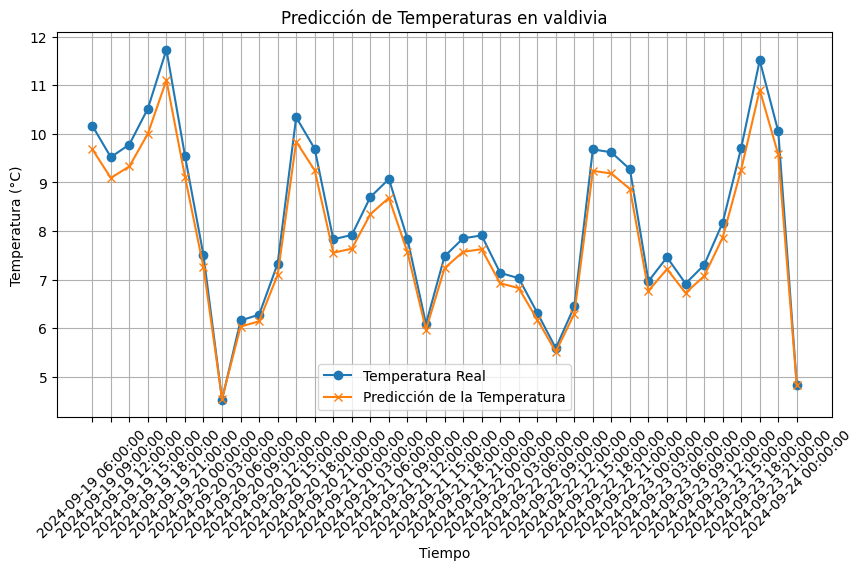

In [34]:
import requests
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
from dotenv import load_dotenv
import os

# Solicitar al usuario que ingrese el nombre de la ciudad
# Esto permite que el usuario especifique para qué ciudad quiere ver el clima.
CITY = input("Ingresa la ciudad para ver el clima: ")

load_dotenv('/content/drive/My Drive/.env')   # la ruta correcta del archivo .env

# Aquí debes poner tu clave API de OpenWeatherMap para poder hacer las solicitudes.
API_KEY = os.getenv('OPENWEATHER_API_KEY')

# Construimos la URL para hacer la solicitud al servicio de clima de OpenWeatherMap.
# Incluimos la ciudad, la clave API, y pedimos que las unidades sean en grados Celsius.
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

# Hacemos una solicitud GET a la API y obtenemos los datos en formato JSON.
response = requests.get(URL)
weather_data = response.json()

# Inicializamos dos listas para almacenar las fechas y las temperaturas.
dates = []
temperatures = []

# Iteramos sobre cada entrada en la lista de pronósticos del clima.
# Cada entrada representa un periodo de tiempo específico (por ejemplo, cada 3 horas).
for entry in weather_data['list']:
    # Convertimos la marca de tiempo Unix a un formato de fecha y hora legible.
    date = datetime.utcfromtimestamp(entry['dt']).strftime('%Y-%m-%d %H:%M:%S')

    # Extraemos la temperatura principal (en grados Celsius) de la entrada.
    temp = entry['main']['temp']

    # Almacenamos la fecha y la temperatura en las listas correspondientes.
    dates.append(date)
    temperatures.append(temp)

# Convertimos la lista de temperaturas a un array de NumPy para facilitar el manejo de datos.
temperatures = np.array(temperatures)

# Creamos un conjunto de datos para entrenar el modelo.
# X será el array de temperaturas, excepto la última.
# y será el array de temperaturas, excepto la primera.
# Esto se hace para que X e y representen valores consecutivos de temperatura.
X = temperatures[:-1].reshape(-1, 1)
y = temperatures[1:].reshape(-1, 1)

# Definimos un modelo de red neuronal simple usando TensorFlow y Keras.
# La red tiene tres capas densas (fully connected):
# - La primera capa tiene 64 neuronas con activación ReLU y una entrada de un solo valor.
# - La segunda capa también tiene 64 neuronas con activación ReLU.
# - La tercera capa tiene una sola neurona, que produce la predicción final.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilamos el modelo con el optimizador Adam y la función de pérdida de error cuadrático medio (MSE).
model.compile(optimizer='adam', loss='mse')

# Entrenamos el modelo usando los datos X e y.
# Se realizan 100 épocas de entrenamiento, donde el modelo ajusta sus pesos para minimizar la pérdida.
model.fit(X, y, epochs=100, verbose=1)

# Usamos el modelo entrenado para hacer predicciones basadas en los datos X.
predictions = model.predict(X)

# Finalmente, graficamos los datos.
plt.figure(figsize=(10,5))

# Graficamos las temperaturas reales con marcadores en forma de círculo.
plt.plot(dates[:-1], temperatures[:-1], label='Temperatura Real', marker='o')

# Graficamos las predicciones del modelo con marcadores en forma de 'x'.
plt.plot(dates[:-1], predictions, label='Predicción de la Temperatura', marker='x')

# Añadimos un título al gráfico que incluye el nombre de la ciudad.
plt.title(f'Predicción de Temperaturas en {CITY}')

# Etiquetamos los ejes X e Y.
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')

# Rotamos las etiquetas del eje X para que se vean mejor.
plt.xticks(rotation=45)

# Añadimos una leyenda para distinguir entre la temperatura real y las predicciones.
plt.legend()

# Añadimos una cuadrícula al gráfico para facilitar la lectura.
plt.grid(True)

# Mostramos el gráfico.
plt.show()


